In [1]:
# libraries
import numpy as np
from tensorflow import keras
from sklearn import preprocessing
import seaborn as sns
import pandas as pd

In [2]:
# loading data
# split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Scale images to the [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0
# Make sure images have shape (784)
x_train = x_train.reshape(60000,-1)
x_test = x_test.reshape(10000,-1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [4]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# default without tuning 
from sklearn.metrics import accuracy_score
rf_model0=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model0.fit(x_train,y_train)


y_pred=rf_model0.predict(x_test)

score0= accuracy_score(y_pred,y_test)
print(f"accuracy score is {score0:.2f}")

accuracy score is 0.90


In [6]:
# Hyper-parameters tuning

from sklearn.model_selection import RandomizedSearchCV

param_grid={
    'n_estimators':[100,200,300],
    'criterion':["gini","entropy","log_loss"],
    'min_samples_leaf':[1,2,4],
    'max_depth':[5,7,10,20],
    'max_features':["sqrt","log2",None],
    'bootstrap':[True,False]
    
}
rf_model=RandomForestClassifier(random_state=42)

grid_search = RandomizedSearchCV(rf_model, param_grid,cv=5,scoring="accuracy",n_iter=20,n_jobs=1,verbose=2)
grid_search.fit(x_train,y_train)
best_rf=grid_search.best_estimator_

print("best parameters : ",grid_search.best_params_)
print("best accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=300; total time= 1.6min
[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=300; total time= 1.7min
[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=300; total time= 1.8min
[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=300; total time= 1.9min
[CV] END bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=300; total time= 2.2min
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time= 3.6min
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time= 3.6min
[CV] END bootstrap=False

In [7]:
# evaluation 
from sklearn.metrics import precision_score , confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
rf_model1=RandomForestClassifier(n_estimators=300,min_samples_leaf=4,max_features='sqrt',max_depth=20,criterion='entropy',bootstrap=False,random_state=42)
rf_model1.fit(x_train,y_train)
y_pred1=rf_model1.predict(x_test)

In [14]:
precision = precision_score(y_test, y_pred1, average='weighted')  
print(f"precision score is {precision:.2f}")

precision score is 0.99


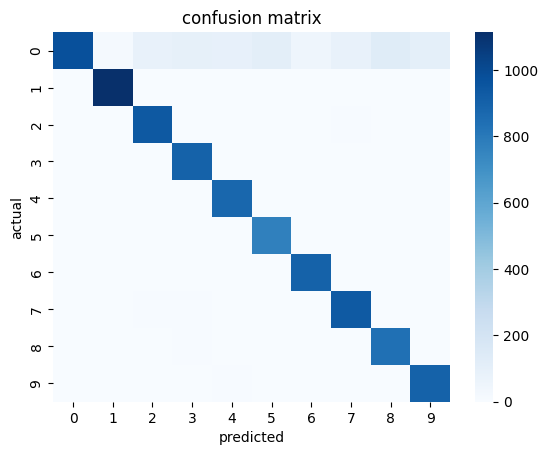

In [18]:
import numpy as np

y_test1 = np.argmax(y_test, axis=1)

y_pred1_ = np.argmax(y_pred1, axis=1)

confusionMatrix=confusion_matrix(y_pred1_,y_test1)
sns.heatmap(confusionMatrix,cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [20]:
classR=classification_report(y_pred1,y_test)
print(classR)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       960
           1       0.98      1.00      0.99      1116
           2       0.91      0.99      0.95       946
           3       0.89      1.00      0.94       899
           4       0.89      0.99      0.94       883
           5       0.87      1.00      0.93       775
           6       0.94      0.99      0.97       906
           7       0.91      0.99      0.95       947
           8       0.86      0.99      0.92       848
           9       0.89      0.99      0.94       907

   micro avg       0.91      0.99      0.95      9187
   macro avg       0.91      0.99      0.95      9187
weighted avg       0.91      0.99      0.95      9187
 samples avg       0.91      0.91      0.91      9187



c:\Users\MNIST_Digit_Classification\tf-env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
